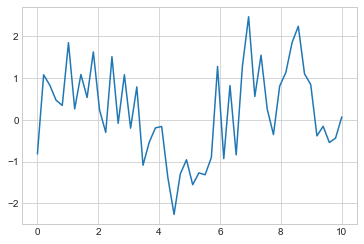

In [7]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

plt.style.use('seaborn-whitegrid')

x = np.linspace(0, 10, 50)
dy = .8
y = np.sin(x) + dy * np.random.randn(50)

plt.plot(x, y)


<ErrorbarContainer object of 3 artists>

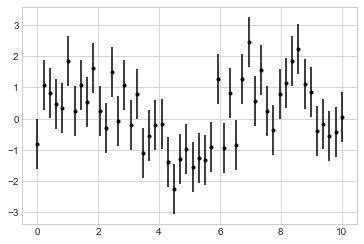

In [8]:
# Show basic error bars
plt.errorbar(x, y, yerr=dy, fmt='.k')

In [9]:

# Show continuous errors
from sklearn.gaussian_process import GaussianProcess
# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)
# Compute the Gaussian process fit
gp = GaussianProcess(corr='cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1,
random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)
xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE) # 2*sigma ~ 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
color='gray', alpha=0.2)
plt.xlim(0, 10);

ImportError: cannot import name 'GaussianProcess' from 'sklearn.gaussian_process' (C:\ProgramData\Anaconda3\lib\site-packages\sklearn\gaussian_process\__init__.py)

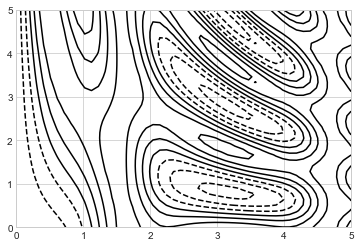

In [10]:
# 3-dim data can be showed in 2-dim using matplotlib functions 
# viz., plt.contour  - to show contour
#       plt.contourf - to show filled contour
#       plt.imshow   - to show the image

# 3-dim function
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

# meshgrid function builds 2-dim grids from 3 -dim arrays
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

# +ve values are shown as solid lines
# -ve values are shown as dashed lines
plt.contour(X, Y, Z, colors='black')

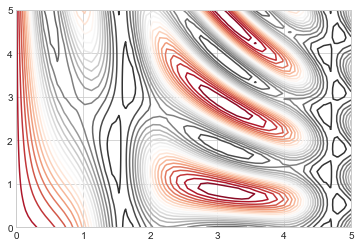

In [13]:
# Drawing in color 
# 4th param 20 indicates the contours to be 20 instead of showing as +ve and -ve
# colormap RdGy stands for Red Gray (matplotlib has several color maps)
plt.contour(X, Y, Z, 20, cmap='RdGy') 

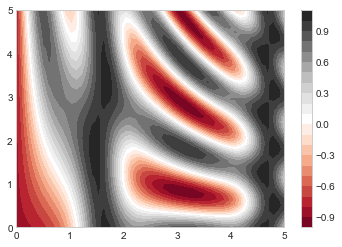

In [15]:
# Space between lines can be filled by using the other function contourf
plt.contourf(X, Y, Z, 20, cmap='RdGy')
# colorbar makes it clear that the black regions are “peaks” while the red regions are “valleys”
plt.colorbar()

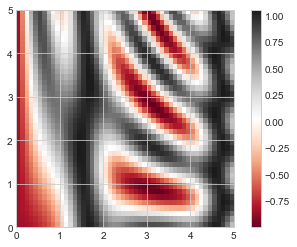

In [16]:
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image');

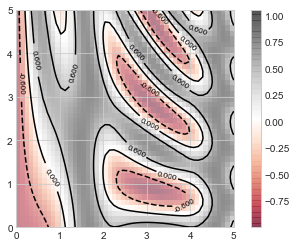

In [17]:
# Combination of fill contour and image
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
cmap='RdGy', alpha=0.5)
plt.colorbar();

(array([ 10.,  31.,  73., 169., 254., 226., 156.,  62.,  14.,   5.]),
 array([-3.05244812, -2.4201358 , -1.78782347, -1.15551114, -0.52319881,
         0.10911352,  0.74142584,  1.37373817,  2.0060505 ,  2.63836283,
         3.27067515]),
 <a list of 10 Patch objects>)

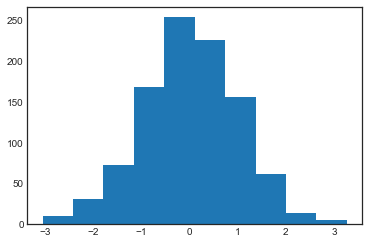

In [23]:
# Histograms, Binnings and Density

# Simple Histogram
# A simple histogram can be a great first step in understanding a dataset
data = np.random.randn(1000)
plt.hist(data)


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


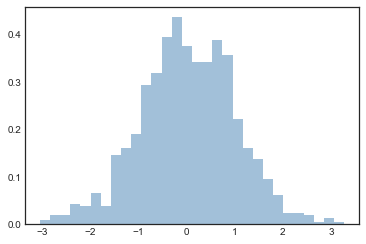

In [25]:
# Customize the above histogram
plt.hist(data, bins=30, normed=True, alpha=0.5, histtype='stepfilled', color='steelblue', edgecolor='none');

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


(array([0.00310437, 0.00310437, 0.00310437, 0.00310437, 0.00620874,
        0.00310437, 0.01862622, 0.01862622, 0.02793933, 0.02793933,
        0.0527743 , 0.07140052, 0.09933986, 0.09002675, 0.09933986,
        0.13969667, 0.12107045, 0.19557534, 0.17074038, 0.19557534,
        0.21730594, 0.18315786, 0.13348793, 0.19867972, 0.17384475,
        0.15211416, 0.15211416, 0.14280105, 0.07450489, 0.08071363,
        0.06208741, 0.05587867, 0.02173059, 0.03104371, 0.02793933,
        0.00931311, 0.01862622, 0.00620874, 0.00620874, 0.00620874]),
 array([-3.80481082, -3.48268433, -3.16055783, -2.83843134, -2.51630484,
        -2.19417835, -1.87205186, -1.54992536, -1.22779887, -0.90567238,
        -0.58354588, -0.26141939,  0.0607071 ,  0.3828336 ,  0.70496009,
         1.02708658,  1.34921308,  1.67133957,  1.99346607,  2.31559256,
         2.63771905,  2.95984555,  3.28197204,  3.60409853,  3.92622503,
         4.24835152,  4.57047801,  4.89260451,  5.214731  ,  5.53685749,
         5.85898

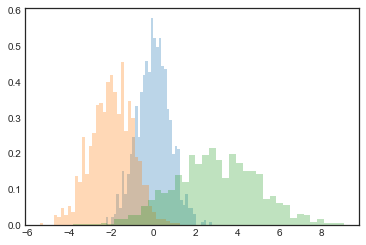

In [37]:
# combination of histtype='stepfilled' along with some transparency
# alpha to be very useful when comparing histograms of several distributions
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)
kwargs = dict(histtype='stepfilled', alpha=0.3, normed=True, bins=40)
plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

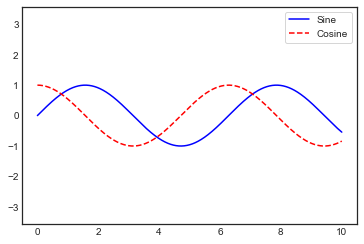

In [43]:
# Default legend
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend()


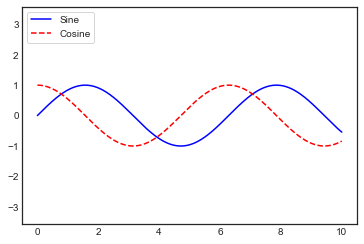

In [44]:
# Customize Legend
# Justify legend to Upper Left with frame around it
ax.legend(loc='upper left', frameon=True)
fig

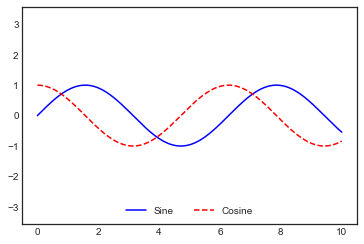

In [49]:
# specify number of columns for legend
ax.legend(loc='lower center', ncol=2)
fig

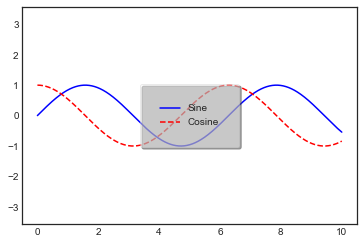

In [62]:
# location, frame, border, shadow, border width
ax.legend(loc='center', frameon=True, fancybox=True, framealpha=0.4, shadow=True, borderpad=2)
fig

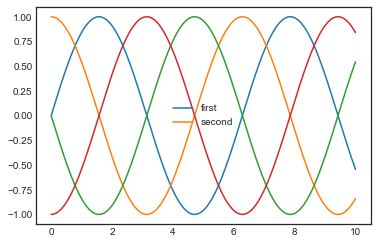

In [65]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);


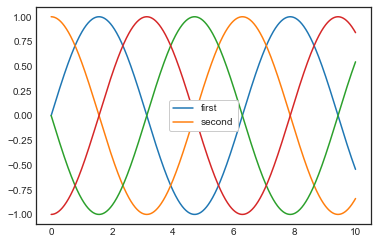

In [66]:
# alternate method
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

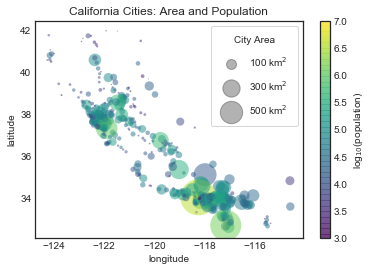

In [84]:
# Sometimes the legend defaults are not sufficient for the given visualization
# using the size of points to mark certain features of the data, and want to create a legend reflecting this.
# example where we’ll use the size of points to indicate populations of California cities
import pandas as pd
cities = pd.read_csv('..\\data\\california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
            c=np.log10(population), cmap='viridis',
            s=area, linewidth=0, alpha=0.5)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area, label=str(area) + ' km$^2$')
    
plt.legend(scatterpoints=1, frameon=True, labelspacing=1, borderpad=1, title='City Area')
plt.title('California Cities: Area and Population');

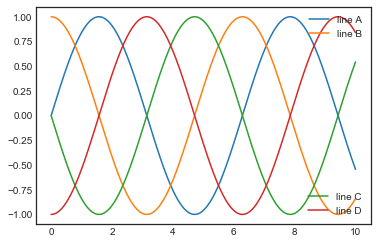

In [87]:
# Multiple Legends
fig, ax = plt.subplots()
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = ax.plot(x, y)

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], loc='lower right', frameon=False)
ax.add_artist(leg);

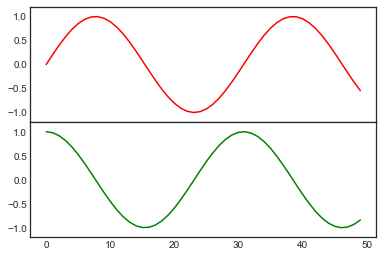

In [110]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4], xticklabels=[], ylim=(-1.2, 1.2)) # l, b, r, t
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4], ylim=(-1.2, 1.2))
x = np.linspace(0, 10)
ax1.plot(np.sin(x), color='r')
ax2.plot(np.cos(x), color='g');

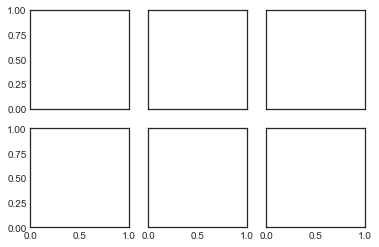

In [111]:
# Defining Sub-plots
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

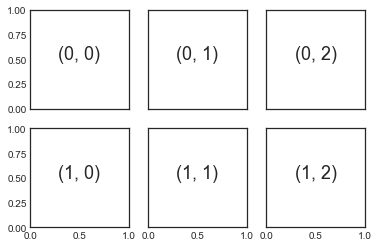

In [114]:
# Labeling the sub-plots
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), fontsize=18, ha='center')
fig

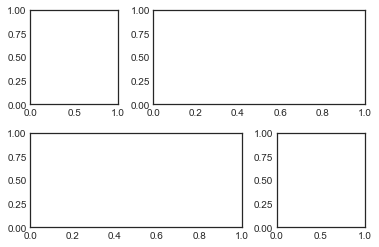

In [115]:
# Irregular plots
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

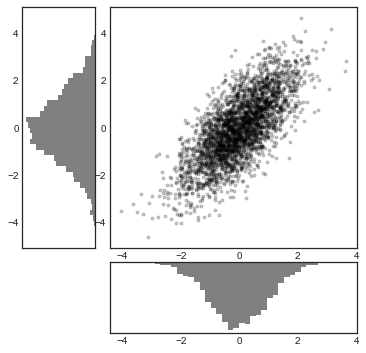

In [116]:
# Visualizing multi-dimensional distributions
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
                orientation='vertical', color='gray')
x_hist.invert_yaxis()
                y_hist.hist(y, 40, histtype='stepfilled',
orientation='horizontal', color='gray')
y_hist.invert_xaxis()